## Data Loading and Exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("marketing_data.csv") 

In [3]:
data.head() # Display the first few rows of the DataFrame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [4]:
data.shape #returns the number of rows and columns

(2240, 28)

In [5]:
data.size # returns the total number of elements

62720

In [6]:
data.info() #gets information about the DataFrame, including column names, non-null counts, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe() # Obtains summary statistics of numeric columns

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### From statistics summary we can get to know that:
Year_Birth: The average birth year of customers is approximately 1968.

Income: The average income of customers is around $52,247.

Recency: The average recency, likely indicating the time since the last purchase, is around 49 days.

NumCatalogPurchases: The average number of catalog purchases made by customers is around 2.66.

NumStorePurchases: On average, customers make around 5.79 purchases in-store.

NumWebVisitsMonth: Customers make an average of 5.32 visits to the website per month.

Complain: On average, the complaint rate is approximately 0.94%.


## Exploring Marital_status,Education,Kidhome and Teenhome features

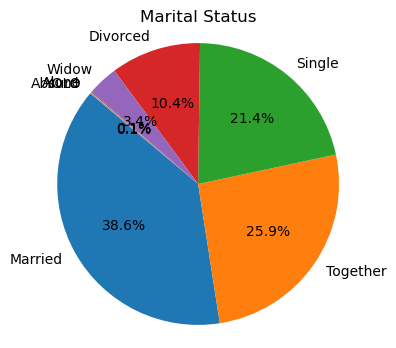

In [8]:
# Exploring Marital_Status feature
marital_status_percentage = data['Marital_Status'].value_counts(normalize=True) * 100

plt.figure(figsize=(4,4))
plt.pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status')
plt.axis('equal') 
plt.show()

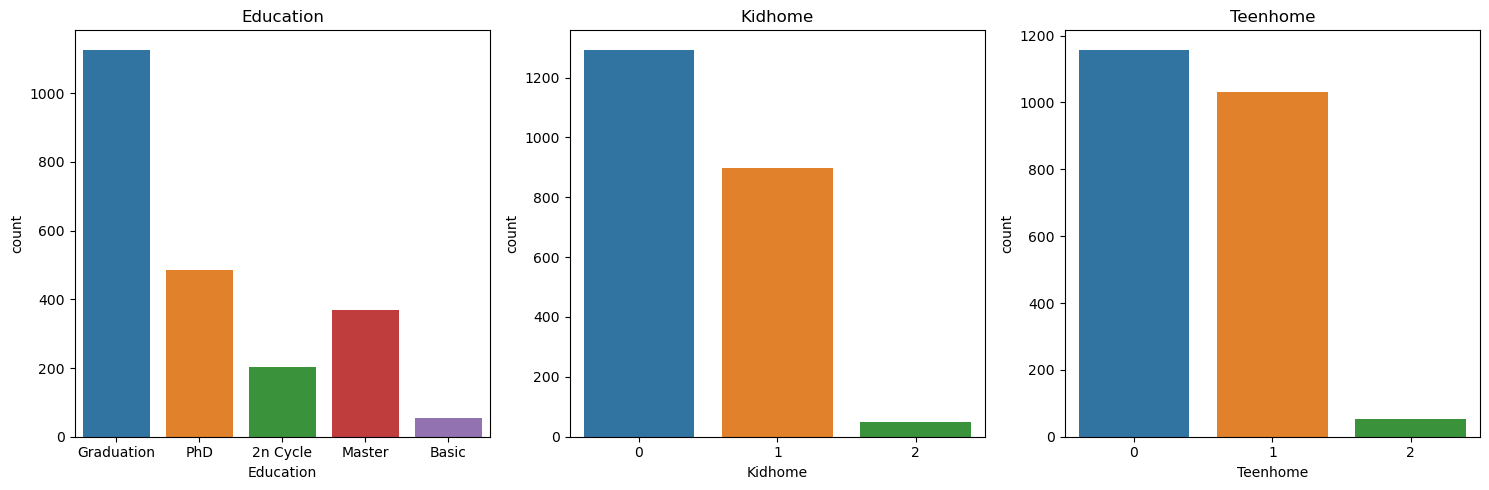

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Exploring Education feature 
sns.countplot(x='Education', data=data, ax=axes[0])
axes[0].set_title('Education')

# Exploring Kidhome feature
sns.countplot(x='Kidhome', data=data, ax=axes[1])
axes[1].set_title('Kidhome')

# Exploring Teenhome feature
sns.countplot(x='Teenhome', data=data, ax=axes[2])
axes[2].set_title('Teenhome')

# Show plot
plt.tight_layout()
plt.show()


## Data Cleaning:

## Handling missing values:

In [10]:
data.isnull().sum() #counts of missing values per column 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

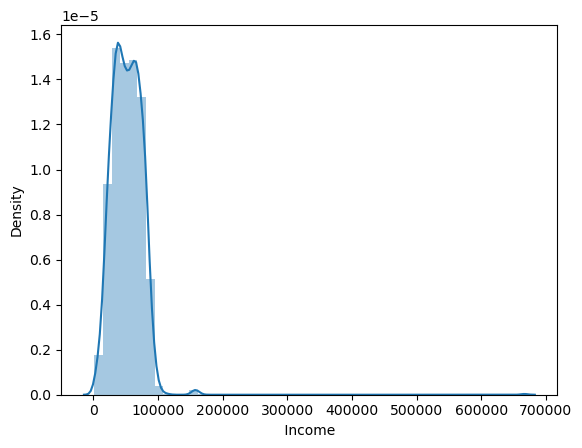

In [11]:
sns.distplot(data[' Income '])  # Let's understand the distribution of Income data
plt.show()

## Since the data is left skewed replace missing values with median

## Imputation

In [12]:
median_income = data[ ' Income '].median()  # Calculates the median income

data[' Income '].fillna(median_income, inplace=True) # Imputes missing values with the median income

In [13]:
data.isnull().sum().sum()

0

In [14]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


## Outlier detection

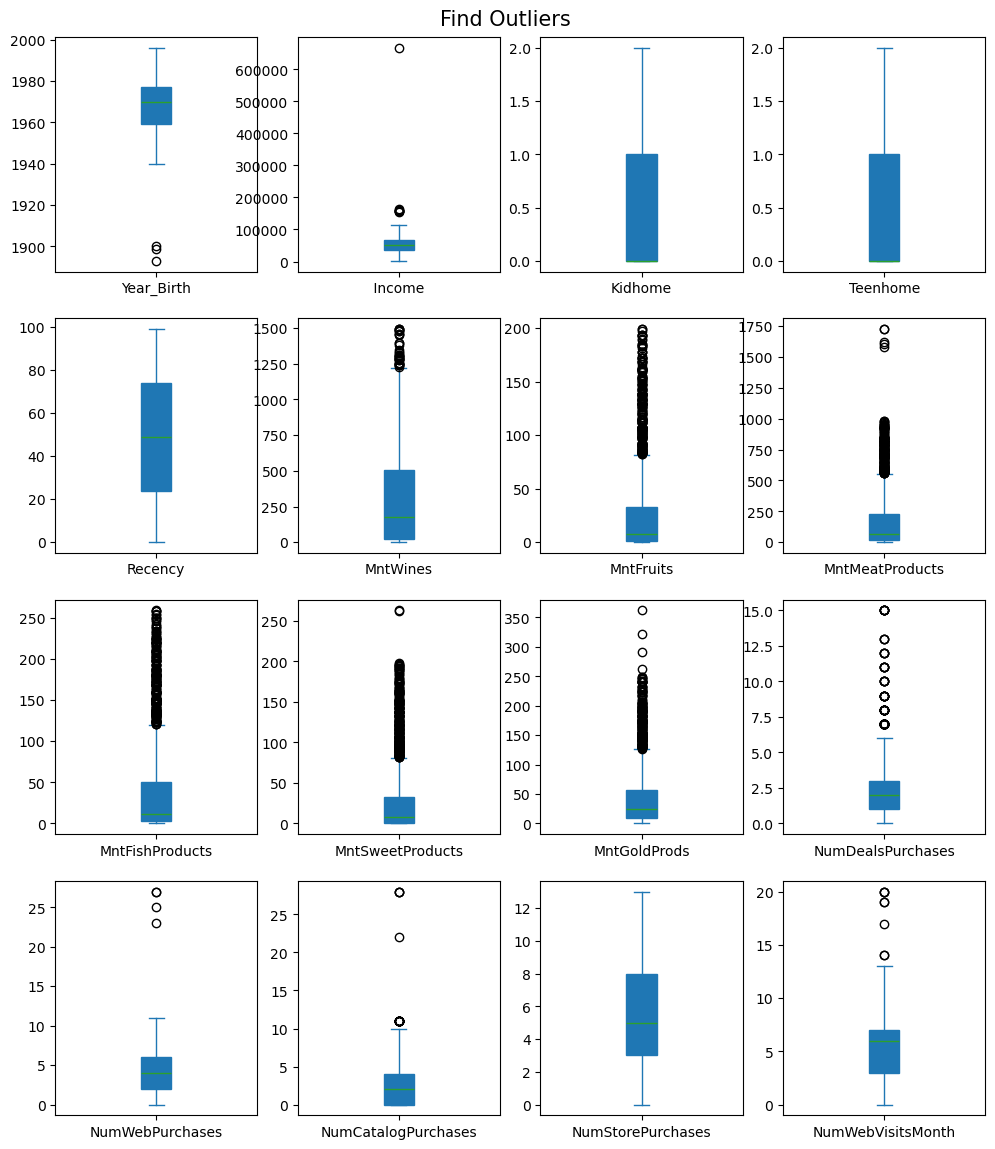

In [15]:
data_to_plot = data.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
data_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### There are three causes for outliers—data entry or measurement errors, sampling problems and unusual conditions, and natural variation.Let's check data entry of columns

### Here in column Year_birth seems like entry errors since it's impossible that people who was born before 1900 still alive. Therefore, I will remove the outliers in Year_birth.

## Handling Outliers

In [16]:
# Using IQR method to remove outliers

Q1 = data['Year_Birth'].quantile(0.25) # First quartile

Q3 = data['Year_Birth'].quantile(0.75)  # Third quartile

IQR = Q3 - Q1  # Interquartile range
    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
#df---data without outlier
df = data[(data['Year_Birth'] >= lower_bound) & (data['Year_Birth'] <= upper_bound)]


In [17]:
df.shape  # data shape(the number of rows and columns) without outlier

(2237, 28)

# Exploratory data analysis

# Which marketing campaign was the most successful?

In [18]:
campaign_success_rates = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()

most_successful_campaign = campaign_success_rates.idxmax()
success_rate = campaign_success_rates.max()

print("The most successful marketing campaign was:", most_successful_campaign)
print("Success rate:", success_rate)

The most successful marketing campaign was: Response
Success rate: 0.14930710773357175


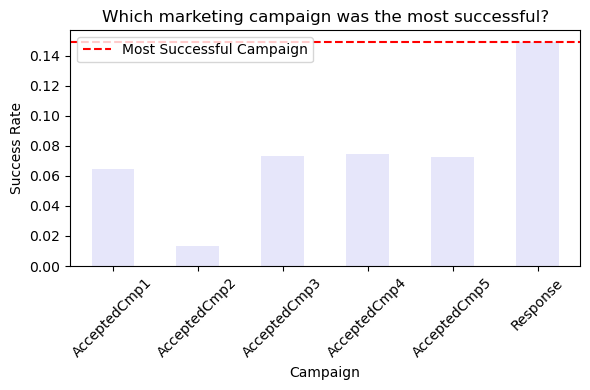

In [19]:
plt.figure(figsize=(6,4))
campaign_success_rates.plot(kind='bar', color='lavender')
plt.title('Which marketing campaign was the most successful?')
plt.xlabel('Campaign')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.axhline(success_rate, color='red', linestyle='--', label='Most Successful Campaign')
plt.legend()
plt.tight_layout()
plt.show()

# Which products are performing best?

In [20]:
product_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

best_performing_product = product_spending.idxmax()
best_performing_product_spending = product_spending.max()

print("The best performing product is:", best_performing_product)
print("Total spending on the best performing product:", best_performing_product_spending)


The best performing product is: MntWines
Total spending on the best performing product: 680038


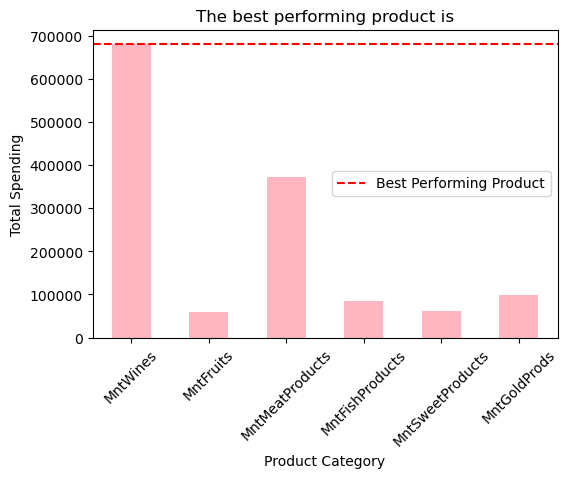

In [21]:
plt.figure(figsize=(6,4))
product_spending.plot(kind='bar', color='lightpink')
plt.title('The best performing product is')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.axhline(best_performing_product_spending, color='red', linestyle='--', label='Best Performing Product')
plt.legend()
plt.show()

# Which channels are underperforming?

In [22]:
channel_conversion_rates = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].apply(lambda x: x.sum() / len(x))

underperforming_channel = channel_conversion_rates.idxmin()
underperforming_channel_conversion_rate = channel_conversion_rates.min()

print("The underperforming channel is:", underperforming_channel)
print("Conversion rate of the underperforming channel:", underperforming_channel_conversion_rate)

The underperforming channel is: NumCatalogPurchases
Conversion rate of the underperforming channel: 2.6624944121591416


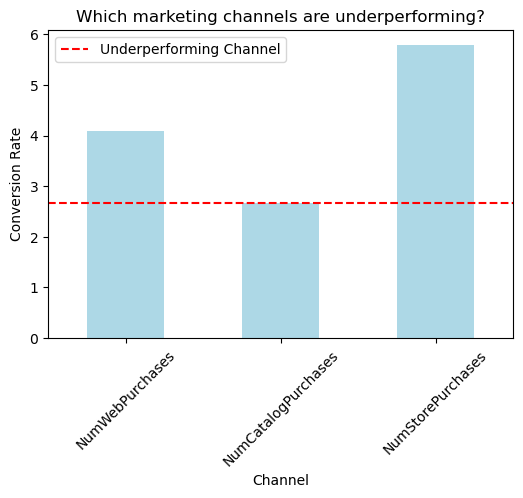

In [23]:
plt.figure(figsize=(6,4))
channel_conversion_rates.plot(kind='bar', color='lightblue')
plt.title('Which marketing channels are underperforming?')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.axhline(underperforming_channel_conversion_rate, color='red', linestyle='--', label='Underperforming Channel')
plt.legend()
plt.show()

In [24]:
# What is the distribution of purchases made by country across different purchase categories?

<Figure size 600x400 with 0 Axes>

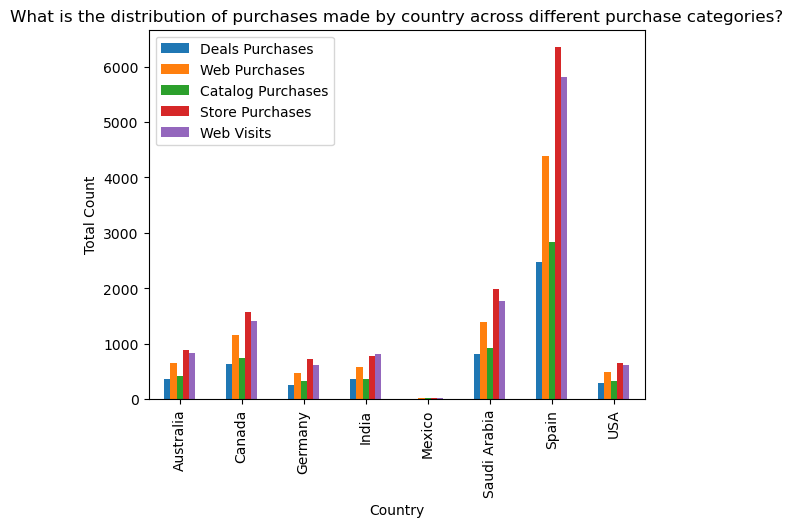

In [25]:
country_purchase_categories = df.groupby('Country')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

# Plotting
plt.figure(figsize=(6,4))
country_purchase_categories.plot(kind='bar')
plt.title('What is the distribution of purchases made by country across different purchase categories?')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.legend(['Deals Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases', 'Web Visits'])
plt.show()

# How much do product purchases vary across different countries?

<Figure size 600x400 with 0 Axes>

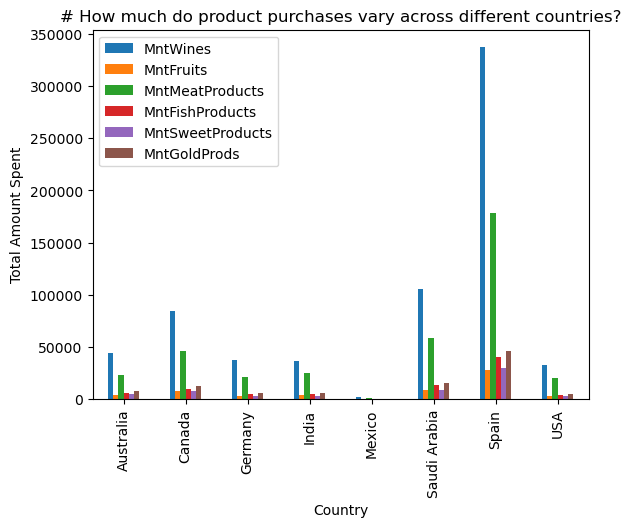

In [26]:
country_product_purchase = df.groupby('Country')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                                  'MntSweetProducts', 'MntGoldProds']].sum()

# Plotting
plt.figure(figsize=(6,4))
country_product_purchase.plot(kind='bar')
plt.title('# How much do product purchases vary across different countries?')
plt.xlabel('Country')
plt.ylabel('Total Amount Spent')
plt.legend(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
plt.show()


## Creating New columns for further Analysis

Age contains the age of each customer,by sub currect year with year of birth

Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns

Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns

Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-
related columns and the "Response" column

AOV: AOV stands for the average order volumn of each customer, which can be manipulate by dividing Total_Mnt by Total_num_purchase

In [27]:
df_new = df.copy()  # Create a copy of the DataFrame
df_new['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [28]:
# Create new columns for month, year, and day
df_new['Enrollment_Month'] = df_new['Dt_Customer'].dt.month
df_new['Enrollment_Year'] = df_new['Dt_Customer'].dt.year
df_new['Enrollment_Day'] = df_new['Dt_Customer'].dt.day


In [29]:
df_new['Total_mnt']=df_new.MntWines + df_new.MntFruits + df_new.MntMeatProducts + df_new.MntFishProducts + df_new.MntSweetProducts + df_new.MntGoldProds

In [30]:
df_new.loc[:, 'total_positive_responses'] = df_new[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                             'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Calculate the total number of customers
total_customers = len(df_new)

# Calculate the total number of positive responses
total_positive_responses = df_new['total_positive_responses'].sum()

In [31]:
df_new['Total_num_purchase'] = df_new.NumDealsPurchases + df_new.NumWebPurchases + df_new.NumCatalogPurchases + df_new.NumStorePurchases

In [32]:
df_new['Total_accept'] = df_new.AcceptedCmp1 + df_new.AcceptedCmp2 + df_new.AcceptedCmp2 + df_new.AcceptedCmp2 + df_new.AcceptedCmp3 + df_new.AcceptedCmp4 + df_new.AcceptedCmp5 + df_new.Response

In [33]:
df_new['AOV'] = df_new.Total_mnt / df_new.Total_num_purchase

In [34]:
# Calculate current year
current_year = pd.Timestamp.now().year

# Calculate age
df_new['Age'] = current_year - df_new['Year_Birth']

In [35]:
# Defining age group ranges
age_groups = {
    (0, 20): '0-20',
    (21, 30): '21-30',
    (31, 40): '31-40',
    (41, 50): '41-50',
    (51, 60): '51-60',
    (61, 70): '61-70',
    (71, 80): '71-80',
    (81, 90): '81-90',
    (91, 100): '91-100'
}


# Function to map age to age group
def map_age_to_group(age):
    for age_range, group_name in age_groups.items():
        if age_range[0] <= age <= age_range[1]:
            return group_name
    return 'Unknown'

df_new['Age_Group'] = df_new['Age'].apply(map_age_to_group)


In [36]:
df_new.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Enrollment_Month,Enrollment_Year,Enrollment_Day,Total_mnt,total_positive_responses,Total_num_purchase,Total_accept,AOV,Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,2014,16,1190,1,15,1,79.333333,54,51-60
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,6,2014,15,577,2,18,4,32.055556,63,61-70
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2014,13,251,0,11,0,22.818182,66,61-70
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,5,2014,11,11,0,4,0,2.750000,57,51-60
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,4,2014,8,91,2,8,2,11.375000,35,31-40


# How many customers have enrolled with the company each year?

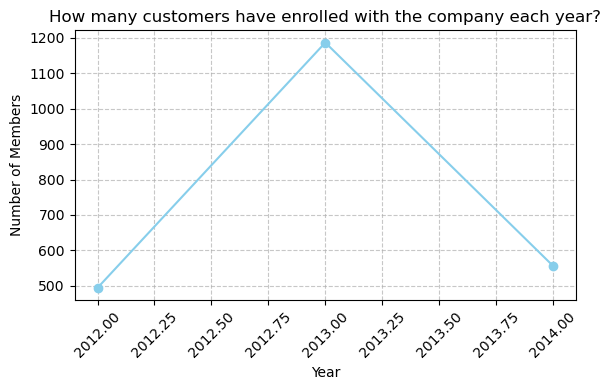

In [37]:
enrollment_counts = df_new['Enrollment_Year'].value_counts().sort_index()

plt.figure(figsize=(6,4))
enrollment_counts.plot(kind='line', marker='o', color='skyblue')
plt.title("How many customers have enrolled with the company each year?")
plt.xlabel('Year')
plt.ylabel('Number of Members')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# What is the total number of purchases made by each age group?

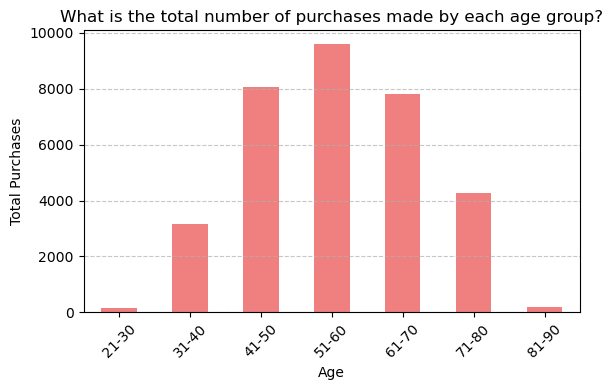

In [38]:
purchase_by_age = df_new.groupby('Age_Group')['Total_num_purchase'].sum()

# Plot the bar chart
plt.figure(figsize=(6,4))
purchase_by_age.plot(kind='bar', color='lightcoral')
plt.title('What is the total number of purchases made by each age group?')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# What is the distribution of purchases and total amount spent by educated customers across different education levels?

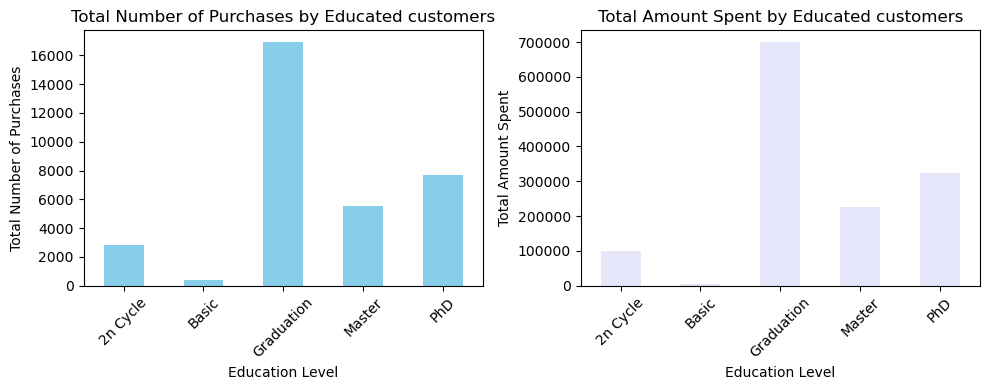

In [39]:
# Grouping the data by education and calculating the total number of purchases and total amount spent by educated customers
Total_No_of_Purchases_by_educated_customers = df_new.groupby('Education')['Total_num_purchase'].sum()
amount_spent_by_educated_customers = df_new.groupby('Education')['Total_mnt'].sum()

# Plotting the bar chart for total number of purchases by education
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
Total_No_of_Purchases_by_educated_customers.plot(kind='bar', color='skyblue')
plt.title('Total Number of Purchases by Educated customers')
plt.xlabel('Education Level')
plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting the bar chart for total amount spent by education
plt.subplot(1, 2, 2)
amount_spent_by_educated_customers.plot(kind='bar', color='lavender')
plt.title('Total Amount Spent by Educated customers')
plt.xlabel('Education Level')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



# What is the total number of purchases made by Marital_status?

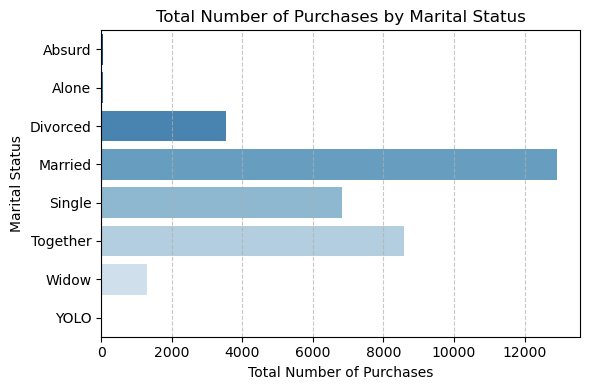

In [40]:
purchase_by_marital_status = df_new.groupby('Marital_Status')['Total_num_purchase'].sum().reset_index()


# Plotting the horizontal bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='Total_num_purchase', y='Marital_Status', data=purchase_by_marital_status, palette='Blues_r')
plt.title('Total Number of Purchases by Marital Status')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Marital Status')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# What is the total number of purchases attributed to the Teen Home?

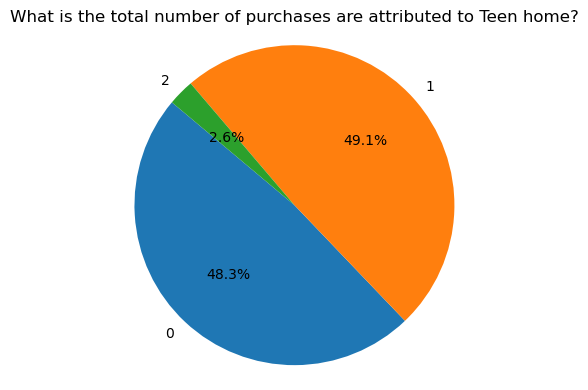

In [41]:
purchase_by_Teenhome = df_new.groupby('Teenhome')['Total_num_purchase'].sum()

# Plot the pie chart
plt.figure(figsize=(4,4))
plt.pie(purchase_by_Teenhome, labels=purchase_by_Teenhome.index, autopct='%1.1f%%', startangle=140)
plt.title('What is the total number of purchases are attributed to Teen home?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# What is the total number of purchases attributed to the Kid Home?

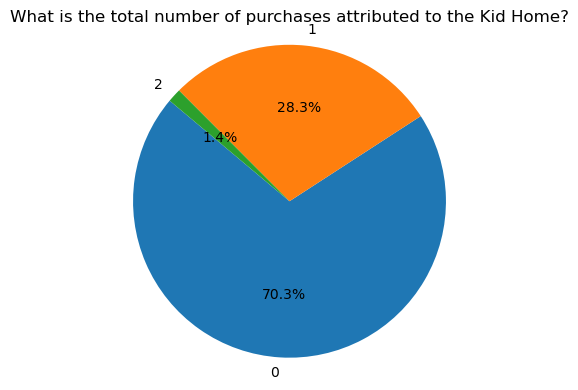

In [42]:
purchase_by_Kidhome = df_new.groupby('Kidhome')['Total_num_purchase'].sum()

# Plot the pie chart
plt.figure(figsize=(4,4))
plt.pie(purchase_by_Kidhome, labels=purchase_by_Kidhome.index, autopct='%1.1f%%', startangle=140)
plt.title('What is the total number of purchases attributed to the Kid Home?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# What is the total number of purchases made for each recency period (days since last purchase)?

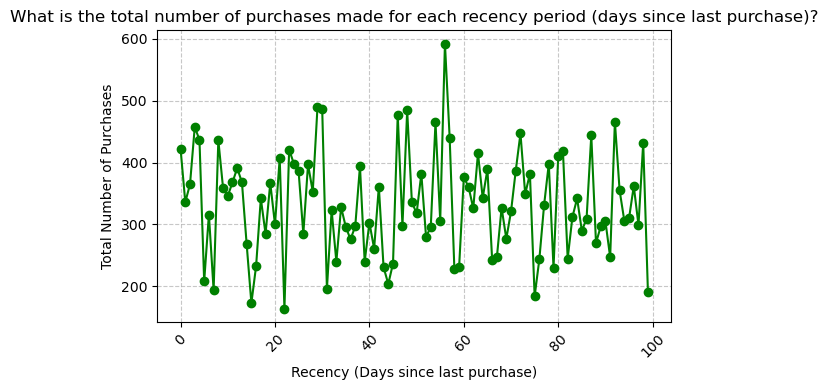

In [43]:
total_purchase_by_recency = df_new.groupby('Recency')['Total_num_purchase'].sum()

# Plot the line plot
plt.figure(figsize=(6,4))
total_purchase_by_recency.plot(kind='line', marker='o', color='green')
plt.title('What is the total number of purchases made for each recency period (days since last purchase)?')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation Analysis

In [44]:
exclude_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                   'NumStorePurchases']

target_column = 'Total_num_purchase' 
# Create an empty dictionary to store correlations
correlations = {}

# Iterate through all columns (excluding the target column)
for column in df.columns:
    if column != target_column and column not in exclude_columns:
        if df[column].dtype in [float, int]:
            correlation = df_new[target_column].corr(df[column])
            correlations[column] = correlation


correlations_data = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

#sorting correlation for easy understanding
correlations_data = correlations_data.sort_values(by='Correlation', ascending=True)


print(correlations_data)


                   Correlation
Kidhome              -0.478494
NumWebVisitsMonth    -0.313162
Year_Birth           -0.179703
ID                   -0.022457
Complain             -0.015727
Recency               0.006073
AcceptedCmp3          0.020406
AcceptedCmp2          0.076905
Teenhome              0.133439
Response              0.154794
AcceptedCmp4          0.189159
AcceptedCmp5          0.218197
AcceptedCmp1          0.219916
MntFruits             0.456060
MntFishProducts       0.469374
MntSweetProducts      0.472681
MntGoldProds          0.494361
MntMeatProducts       0.554316
 Income               0.563999
MntWines              0.712838


In [45]:
positive_corr_columns = []
negative_corr_columns = []
no_corr_columns = []

for column, correlation in correlations.items():
    if correlation > 0:
        positive_corr_columns.append(column)
    elif correlation < 0:
        negative_corr_columns.append(column)
    else:
        no_corr_columns.append(column)

print("Columns with positive correlation:")
print(positive_corr_columns)
print("\nColumns with negative correlation:")
print(negative_corr_columns)
print("\nColumns with no correlation:")
print(no_corr_columns)


Columns with positive correlation:
[' Income ', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

Columns with negative correlation:
['ID', 'Year_Birth', 'Kidhome', 'NumWebVisitsMonth', 'Complain']

Columns with no correlation:
[]


# We get to know that

 'Income', 'Teenhome', 'MntWines', 'MntFruits', etc., have positive correlation coefficients, indicating that as the values in these columns increase, the total num of purchases tends to increase as well.
 
 This suggests that customers with higher income levels, teenagers in the household, and those who purchase more wines, fruits, meats, etc., are more likely to make purchases.

 ID', 'Year_Birth', 'Kidhome', etc., have negative correlation coefficients, implying that as the values in these columns increase, the total num of purchases tends to decrease.
 
 This could mean that older customers, households with more children, and those who have made fewer visits to the website tend to make fewer purchases.


## Key Performance Indicators (KPIs) for tracking campaign success

Conversion Rate: Calculated by dividing the total number of positive responses (Total_Positive_Responses) by the total number of customers. This indicates the percentage of customers who responded positively to marketing campaigns or offers.

Customer Acceptance Rate: Calculated by dividing the total number of accepted offers (Total_accept) by the total number of customers. This indicates the percentage of customers who accepted marketing offers.

Purchase Frequency: Calculated by dividing the total number of purchases (Total_num_purchase) by the total number of customers. This indicates how often, on average, customers make purchases.

In [46]:
# Calculating Conversion Rate
conversion_rate = df_new['total_positive_responses'].sum() / len(df_new)

print("Conversion Rate:", conversion_rate)

Conversion Rate: 0.4470272686633885


In [47]:
# Calculating Customer Acceptance Rate
acceptance_rate = df_new['Total_accept'].sum() / len(df_new)

print("Customer Acceptance Rate:", acceptance_rate)

Customer Acceptance Rate: 0.47384890478319175


In [48]:
# Calculating Purchase Frequency
purchase_frequency = df_new['Total_num_purchase'].sum() / len(df_new)

print("Purchase Frequency:", purchase_frequency)

Purchase Frequency: 14.87080911935628


# Customer Segmentation

In [49]:
label_encoder = preprocessing.LabelEncoder()
  
df_new['Education'] = label_encoder.fit_transform(df_new['Education'])
df_new['Marital_Status'] = label_encoder.fit_transform(df_new['Marital_Status'])
df_new['Country'] = label_encoder.fit_transform(df_new['Country'])
df_new['Age_Group'] = label_encoder.fit_transform(df_new['Age_Group'])
df_new['Dt_Customer'] = (df_new['Dt_Customer'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

In [50]:
df_new.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Enrollment_Month,Enrollment_Year,Enrollment_Day,Total_mnt,total_positive_responses,Total_num_purchase,Total_accept,AOV,Age,Age_Group
0,1826,1970,2,2,84835.0,0,0,16237,0,189,...,6,2014,16,1190,1,15,1,79.333333,54,3
1,1,1961,2,4,57091.0,0,0,16236,0,464,...,6,2014,15,577,2,18,4,32.055556,63,4
2,10476,1958,2,3,67267.0,0,1,16203,0,134,...,5,2014,13,251,0,11,0,22.818182,66,4
3,1386,1967,2,5,32474.0,1,1,16201,0,10,...,5,2014,11,11,0,4,0,2.750000,57,3
4,5371,1989,2,4,21474.0,1,0,16168,0,6,...,4,2014,8,91,2,8,2,11.375000,35,1


In [51]:
df_new.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Enrollment_Month,Enrollment_Year,Enrollment_Day,Total_mnt,total_positive_responses,Total_num_purchase,Total_accept,AOV,Age,Age_Group
0,1826,1970,2,2,84835.0,0,0,16237,0,189,...,6,2014,16,1190,1,15,1,79.333333,54,3
1,1,1961,2,4,57091.0,0,0,16236,0,464,...,6,2014,15,577,2,18,4,32.055556,63,4
2,10476,1958,2,3,67267.0,0,1,16203,0,134,...,5,2014,13,251,0,11,0,22.818182,66,4
3,1386,1967,2,5,32474.0,1,1,16201,0,10,...,5,2014,11,11,0,4,0,2.750000,57,3
4,5371,1989,2,4,21474.0,1,0,16168,0,6,...,4,2014,8,91,2,8,2,11.375000,35,1


## Model Building

## K-Means

In [52]:
#Selecting relevant columns
features = ['Education','Marital_Status',' Income ', 'Kidhome','Teenhome',
            'Total_accept', 'Total_num_purchase', 'Age', 'total_positive_responses']
X = df_new[features]

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

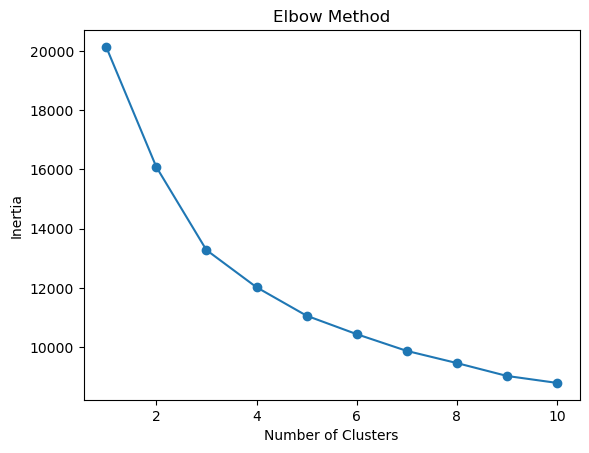

In [53]:
# Determining the number of clusters (using the elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [54]:
# K-means algorithm with the selected number of clusters

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

#cluster labels
df_new['Cluster'] = kmeans.labels_

print("Cluster Centroids:")
cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Inverse transform the cluster centers
centroids_df = pd.DataFrame(cluster_centroids, columns=features)
centroids_df


Cluster Centroids:


,Education,Marital_Status,Income,Kidhome,Teenhome,Total_accept,Total_num_purchase,Age,total_positive_responses
0,2.618605,3.711628,76795.379070,0.111628,0.302326,2.981395,20.665116,55.120930,2.702326
1,2.177161,3.679829,33565.121665,0.905016,0.372465,0.171825,8.259338,50.411953,0.171825
2,2.539171,3.776959,63475.747005,0.112442,0.662673,0.237788,19.432258,59.141014,0.237788


1. Cluster 0:

   - Education: High
   - Marital Status: Mostly married or in a relationship
   - Income: Relatively high
   - Household Composition: Few children and teenagers at home
   - Total Acceptance: Moderate
   - Total Number of Purchases: Relatively high
   - Age: Mid to late 50s
   - Positive Responses: Moderate

3. Cluster 1:

   - Education: Moderate
   - Marital Status: Mostly married or in a relationship
   - Income: Relatively low
   - Household Composition: Many children and teenagers at home
   - Total Acceptance: Low
   - Total Number of Purchases: Low
   - Age: Around 50
   - Positive Responses: Low

5. Cluster 2:

   - Education: Moderate to high
   - Marital Status: Mostly married or in a relationship
   - Income: Moderate
   - Household Composition: Few children but more teenagers at home
   - Total Acceptance: Low
   - Total Number of Purchases: Moderate
   - Age: Late 50s to early 60s
   - Positive Responses: Low

Cluster 0 represents relatively affluent, older customers with moderate to high education levels, while Cluster 1 comprises younger families with lower incomes and education levels, and Cluster 2 consists of older customers with moderate incomes and education levels. 

## A/B Testing Results for marketing strategies using Chi Square

In [55]:
contingency_table = pd.crosstab(df_new['AcceptedCmp1'], df_new['AcceptedCmp2'])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    if chi2_stat > 0:
        print("Campaign 1 performed significantly better than Campaign 2.")
    else:
        print("Campaign 2 performed significantly better than Campaign 1.")
else:
    print("There is no statistically significant difference between Campaign A and Campaign B.")


Chi-squared Statistic: 62.66102160471962
P-value: 2.4552710251382723e-15
Campaign 1 performed significantly better than Campaign 2.


In [56]:
# Define a contingency table
contingency_table = pd.crosstab(df_new['AcceptedCmp3'], df_new['AcceptedCmp4'])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    if chi2_stat > 0:
        print("Campaign 3 performed significantly better than Campaign 4.")
    else:
        print("Campaign 4 performed significantly better than Campaign 3.")
else:
    print("There is no statistically significant difference between Campaign 3 and Campaign 4.")


Chi-squared Statistic: 13.042084806862077
P-value: 0.0003045688670249229
Campaign 3 performed significantly better than Campaign 4.


In [57]:
# Define a contingency table
contingency_table = pd.crosstab(df_new['AcceptedCmp4'], df_new['Response'])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    if chi2_stat > 0:
        print("Campaign 5 performed significantly better than Campaign 6.")
    else:
        print("Campaign 6 performed significantly better than Campaign 5.")
else:
    print("There is no statistically significant difference between Campaign 5  and Campaign 6.")


Chi-squared Statistic: 68.11989552442566
P-value: 1.5385048540748944e-16
Campaign 5 performed significantly better than Campaign 6.


In [58]:
# Define a contingency table
contingency_table = pd.crosstab(df_new['AcceptedCmp1'], df_new['Response'])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    if chi2_stat > 0:
        print("Campaign 6 performed significantly better than Campaign 1.")
    else:
        print("Campaign 1 performed significantly better than Campaign 6.")
else:
    print("There is no statistically significant difference between Campaign 1 and Campaign 6.")


Chi-squared Statistic: 189.85729200663184
P-value: 3.4157114424353905e-43
Campaign 6 performed significantly better than Campaign 1.


# ROI Analysis

In [59]:
# Calculating total revenue
df_new['Total_Revenue'] = df_new['MntWines'] + df_new['MntFruits'] + df_new['MntMeatProducts'] + df_new['MntFishProducts'] + df_new['MntSweetProducts'] + df_new['MntGoldProds']

# Print or use the total revenue
print("Total Revenue:", df_new['Total_Revenue'].sum())

Total Revenue: 1355048


### Actionable Data-Driven Solutions

Keep using the same marketing techniques in the last campaign, and with a focus on promoting meat products and wines

Try to spend more marketing budget in Spain, and less in India

Also try marketing social media(Instagram,Facebook,Youtube and through email) ads 